# Introduction

It wasn't until 1999 that the euro really began its journey, when 11 countries (Austria, Belgium, Finland, France, Germany, Ireland, Italy, Luxembourg, the Netherlands, Portugal and Spain) fixed their exchange rates and created a new currency with monetary policy passed to the European Central Bank. Today euro is 20+ years old.

Currently, the euro (€) is the official currency of 19 out of 27 EU member countries which together constitute the Eurozone, officially called the euro area.
* Euro area member countries  
Although all EU countries are part of the Economic and Monetary Union (EMU), 19 of them have replaced their national currencies with the single currency – the euro. These EU countries form the euro area, also known as the eurozone: **Austria, Belgium, Cyprus, Estonia, Finland, France, Germany, Greece, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, the Netherlands, Portugal, Slovakia, Slovenia, Spain**.
* Non-euro area member countries  
These are countries where the euro has still not been adopted, but who will join once they have met the necessary conditions. Mostly, it consists of countries of member states which acceded to the Union in 2004, 2007 and 2013, after the euro was launched in 2002: **Bulgaria, Croatia, Czech Republic, Hungary, Poland, Romania, Sweden**.
* Member countries with an opt-out  
Occasionally, member states can negotiate an opt-out from any of the European Union legislation or treaties, and agree to not participate in certain policy areas. Concerning the single currency, this is the case for Denmark. It kept its former currency after becoming member of the EU. This list includes only **Denmark**.
* Outside the EU  
The euro is also the sole currency of **Montenegro** and **Kosovo**.  

source: [Which countries use the euro?](https://europa.eu/european-union/about-eu/euro/which-countries-use-euro_en)

Watch short video about Euro history before we start exploratory analysis:

# History of Euro vs Polish Zloty [ANIMATED!]
In this notebook we are going to study the history of the Euro vs Polish Zloty using our generated plot. 

There are 7 interesting highlights in the history of the Euro let's take a look at them:
* 1- The currency was introduced in non-physical form (traveller's cheques, electronic transfers, banking, etc.) at midnight on 1 January 1999 [[source]](https://en.wikipedia.org/wiki/History_of_the_euro#Launch)
* 2- Transition from national legacy currencies to euro 2002 [[source]](https://en.wikipedia.org/wiki/History_of_the_euro#Aftermath)
* 3- Global financial crisis 2008 [[source]](https://en.wikipedia.org/wiki/History_of_the_euro#Recession_era)
* 4- Greek Crisis 2010 [[source]](https://www.thebalance.com/what-is-the-greece-debt-crisis-3305525#:~:text=Why%20Greece%20Didn't%20Leave%20the%20Eurozone&text=Without%20the%20austerity%20measures%2C%20the,lowered%20its%20euro%20exchange%20rate.)
* 5- Poland become a member of the European Union [[source]](https://en.wikipedia.org/wiki/Treaty_of_Accession_2003)
* 6- Euro plunging for many reasons Much of has been about the strength of the Dollar 2014. [[source]](https://money.cnn.com/2015/01/05/investing/euro-slump-deepens/index.html)
* 7- Quantitative Easing start in Europe 2015 [[source]](https://www.reuters.com/article/us-eurozone-ecb-qe-idUSKBN1OB1SM)
* 8- Coronavirus Pandemic 2020 [[source]](https://www.statista.com/statistics/1102209/coronavirus-cases-development-europe/)

In [1]:
# Install celluloid for animation 
# Documentation: https://pypi.org/project/celluloid/
!pip install celluloid 

In [2]:
# Load packages
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
from datetime import datetime
from celluloid import Camera
from IPython.display import Image
%matplotlib inline


import seaborn as sns
sns.set_style('white')

In [3]:
# Read data
PATH = '../input/euro-exchange-daily-rates-19992020/euro-daily-hist_1999_2022.csv'
df = pd.read_csv(PATH)

In [4]:
# Show first 5 rows for data exploration
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-01-10,1.5774,1.9558,6.3969,1.4327,1.0446,7.2128,NaN,24.357,7.4381,...,4.9449,84.9825,10.3038,1.5344,NaN,NaN,38.0740,15.7183,1.1318,17.6999
1,2022-01-07,1.5804,1.9558,6.4343,1.4374,1.0422,7.2060,NaN,24.439,7.4380,...,4.9451,85.2980,10.2839,1.5356,NaN,NaN,38.0740,15.7206,1.1298,17.6701
2,2022-01-06,1.5778,1.9558,6.4420,1.4451,1.0395,7.2187,NaN,24.528,7.4393,...,4.9435,86.5088,10.3265,1.5388,NaN,NaN,37.9620,15.5504,1.1315,17.7932
3,2022-01-05,1.5600,1.9558,6.4146,1.4399,1.0364,7.2087,NaN,24.581,7.4384,...,4.9460,85.7275,10.2545,1.5340,NaN,NaN,37.6070,15.2446,1.1319,17.9369
4,2022-01-04,1.5682,1.9558,6.4174,1.4382,1.0355,7.1924,NaN,24.745,7.4378,...,4.9481,84.9202,10.2808,1.5310,NaN,NaN,37.5820,15.1384,1.1279,18.1080


In [5]:
# Understanding of our columns and their dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5958 non-null   object 
 1   [Australian dollar ]      5958 non-null   object 
 2   [Bulgarian lev ]          5556 non-null   object 
 3   [Brazilian real ]         5690 non-null   object 
 4   [Canadian dollar ]        5958 non-null   object 
 5   [Swiss franc ]            5958 non-null   object 
 6   [Chinese yuan renminbi ]  5690 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5958 non-null   object 
 9   [Danish krone ]           5958 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5958 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5958 non-null   object 
 14  [Croatia

# Clean
Below, we do the following:

* We rename the `[Polish Zloty ]` and `Period\Unit:` columns to something easier to type — PNL and time.
* We change the time column to a datetime data type.
* We sort the values by time in ascending order.
* We reset the index (and drop the initial index).
* Isolate `time` & `PNL` in a separate df since this is our area of focus.
* Drop rows with `PNL` value = `-`
* Convert the `PNL` column to a float data type.

## Columns renaming

In [6]:
df.rename(columns={'[Polish zloty ]':'PNL', 'Period\\Unit:':'time'}, inplace=True)

# Test
df[['time','PNL']].sample()

,time,PNL
5130,2002-03-06,3.6190


## Change the time column to a datetime data type

In [7]:
df['time'] = pd.to_datetime(df.time)

# Test
df.time.dtype

dtype('<M8[ns]')

## Sort the values by time in ascending order & reset index.

In [8]:
df = df.sort_values('time').reset_index(drop=True)

# Test
df.head()

,time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


## Isolate `time` & `PNL` in a separate df

In [9]:
PNL_df = df[['time','PNL']].copy()

# Test
PNL_df.sample()

,time,PNL
3889,2013-12-09,4.1867


In [10]:
PNL_df.PNL.value_counts()

-         62
4.2953     6
4.2925     6
4.1765     6
4.1770     6
          ..
3.8103     1
3.8123     1
3.8141     1
3.8008     1
4.5334     1
Name: PNL, Length: 4300, dtype: int64

## Drop rows with `PNL` value = `-`

In [11]:
PNL_df.drop(index=PNL_df[PNL_df['PNL']=='-'].index, inplace=True)

# Test
PNL_df.PNL.value_counts()

4.2925    6
4.1770    6
4.1765    6
4.2953    6
4.0875    5
         ..
3.8103    1
3.8123    1
3.8141    1
3.8008    1
4.5334    1
Name: PNL, Length: 4299, dtype: int64

## Convert the `PNL` column to a float data type.

In [12]:
PNL_df.us_dollar = PNL_df.PNL.astype('float')

# Test
PNL_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    5896 non-null   datetime64[ns]
 1   PNL     5896 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 138.2+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [13]:
#save it for the forecast
future_pnl = PNL_df

# EDA and currency comparisons


In [14]:
df_cur = pd.read_csv("../input/euro-exchange-daily-rates-19992020/euro-daily-hist_1999_2022.csv", parse_dates=["Period\\Unit:"])
df_cur.sample(5)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5948,1999-01-15,1.8388,NaN,NaN,1.7797,1.5984,NaN,0.58187,35.860,7.4441,...,1.3164,26.5662,9.1570,1.9570,187.1333,42.738,43.4042,0.3742,1.1626,7.2197
1960,2014-05-16,1.4633,1.9558,3.0353,1.4897,1.2210,8.5379,NaN,27.443,7.4646,...,4.4357,47.6920,9.0122,1.7136,NaN,NaN,44.5120,2.8755,1.3696,14.2219
3585,2008-02-06,1.6315,1.9558,2.5737,1.4705,1.6061,10.5037,NaN,25.635,7.4527,...,3.6610,36.0530,9.4288,2.0696,NaN,33.400,45.3030,1.7335,1.4621,11.1924
1689,2015-06-09,1.4606,1.9558,3.4925,1.3889,1.0465,6.9810,NaN,27.356,7.4603,...,4.4708,62.8285,9.3535,1.5196,NaN,NaN,37.9410,3.0758,1.1249,13.9876
952,2018-04-24,1.6038,1.9558,4.2085,1.5662,1.1944,7.7012,NaN,25.437,7.4478,...,4.6530,75.2566,10.3775,1.6154,NaN,NaN,38.4100,4.9985,1.2213,15.0663


In [15]:
names = str.maketrans('', '', '[]')
df_cur.columns = df_cur.columns.str.translate(names)
df_cur.columns = df_cur.columns.str.strip()
df_cur.set_index('Period\\Unit:', inplace=True)
df_cur.index.rename('DateSeries', inplace = True)
df_cur.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5958 entries, 2022-01-10 to 1999-01-04
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Australian dollar      5958 non-null   object 
 1   Bulgarian lev          5556 non-null   object 
 2   Brazilian real         5690 non-null   object 
 3   Canadian dollar        5958 non-null   object 
 4   Swiss franc            5958 non-null   object 
 5   Chinese yuan renminbi  5690 non-null   object 
 6   Cypriot pound          2346 non-null   object 
 7   Czech koruna           5958 non-null   object 
 8   Danish krone           5958 non-null   object 
 9   Estonian kroon         3130 non-null   object 
 10  UK pound sterling      5958 non-null   object 
 11  Greek drachma          520 non-null    object 
 12  Hong Kong dollar       5958 non-null   object 
 13  Croatian kuna          5690 non-null   object 
 14  Hungarian forint       5958 non-null  

### Dataframe:  
* has 1 unique DatetimeIndex (column `DateSeries`) and 40 data columns of different currencies;
* Not all of 40 data columns were converted straight to `float64` type. `Object` type indicates a column has text. It's most common to one-hot encode these "object" columns, since they can't be plugged directly into most models;
* there is null data in some columns, for example Iceland krona, Greek Drachma etc.

### 2. Convert columns data to numeric
* convert all series to float64. Then invalid parsing will be set as NaN ('coerse' parameter).

In [16]:
cols = list(df_cur)
df_cur[cols] = df_cur[cols].apply(pd.to_numeric, errors='coerce')
df_cur.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5958 entries, 2022-01-10 to 1999-01-04
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Australian dollar      5896 non-null   float64
 1   Bulgarian lev          5498 non-null   float64
 2   Brazilian real         5629 non-null   float64
 3   Canadian dollar        5896 non-null   float64
 4   Swiss franc            5896 non-null   float64
 5   Chinese yuan renminbi  5629 non-null   float64
 6   Cypriot pound          2304 non-null   float64
 7   Czech koruna           5896 non-null   float64
 8   Danish krone           5896 non-null   float64
 9   Estonian kroon         3074 non-null   float64
 10  UK pound sterling      5896 non-null   float64
 11  Greek drachma          514 non-null    float64
 12  Hong Kong dollar       5896 non-null   float64
 13  Croatian kuna          5629 non-null   float64
 14  Hungarian forint       5896 non-null  

### 2. Process NaN values

* count NaN values in every column:

In [17]:
df_cur.isnull().sum(axis = 0)

Australian dollar          62
Bulgarian lev             460
Brazilian real            329
Canadian dollar            62
Swiss franc                62
Chinese yuan renminbi     329
Cypriot pound            3654
Czech koruna               62
Danish krone               62
Estonian kroon           2884
UK pound sterling          62
Greek drachma            5444
Hong Kong dollar           62
Croatian kuna             329
Hungarian forint           62
Indonesian rupiah          62
Israeli shekel            330
Indian rupee              329
Iceland krona            2407
Japanese yen               62
Korean won                 62
Lithuanian litas         1861
Latvian lats             2116
Maltese lira             3654
Mexican peso               62
Malaysian ringgit          62
Norwegian krone            62
New Zealand dollar         62
Philippine peso            62
Polish zloty               62
Romanian leu               62
Russian rouble             62
Swedish krona              62
Singapore 

* find rows with only NaN values: print them by index (DateSeries) and delete these rows:

In [18]:
n = df_cur.index[df_cur.isnull().all(1)]
print(n)
print('Number of NaN rows: {}'.format(len(n)))

DatetimeIndex(['2012-05-01', '2012-04-09', '2012-04-06', '2011-12-26',
               '2011-04-25', '2011-04-22', '2010-04-05', '2010-04-02',
               '2010-01-01', '2009-12-25', '2009-05-01', '2009-04-13',
               '2009-04-10', '2009-01-01', '2008-12-26', '2008-12-25',
               '2008-05-01', '2008-03-24', '2008-03-21', '2008-01-01',
               '2007-12-26', '2007-12-25', '2007-05-01', '2007-04-09',
               '2007-04-06', '2007-01-01', '2006-12-26', '2006-12-25',
               '2006-05-01', '2006-04-17', '2006-04-14', '2005-12-26',
               '2005-03-28', '2005-03-25', '2004-04-12', '2004-04-09',
               '2004-01-01', '2003-12-26', '2003-12-25', '2003-05-01',
               '2003-04-21', '2003-04-18', '2003-01-01', '2002-12-26',
               '2002-12-25', '2002-05-01', '2002-04-01', '2002-03-29',
               '2002-01-01', '2001-12-31', '2001-12-26', '2001-12-25',
               '2001-05-01', '2001-04-16', '2001-04-13', '2001-01-01',
      

In [19]:
df_cur = df_cur.drop(n)

* U can replace currency which doesn't exist anymore by the last value it had before it was replaced by the Euro €: Cypriot pound (2007), Estonian kroon (2011), Greek drachma (2002), Lithuanian litas (2015), Latvian lats (2014), Maltese lira (2008), Slovenian tolar (2007), Slovak koruna (2009). For now this cell is commented.


In [20]:
#df_cur = df_cur.fillna(method='backfill')

In [21]:
df_cur.describe(include='all')

,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,Estonian kroon,...,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
count,5896.000000,5498.000000,5629.000000,5896.000000,5896.000000,5629.000000,2304.000000,5896.000000,5896.000000,3.074000e+03,...,5896.000000,5896.000000,5896.000000,5896.000000,2049.000000,2560.000000,5896.000000,5896.000000,5896.000000,5896.000000
mean,1.579404,1.954538,3.319873,1.469863,1.348151,8.560950,0.578354,28.299537,7.448393,1.564660e+01,...,3.914325,47.989682,9.431224,1.756232,224.630090,39.512409,41.877210,3.039845,1.198867,11.657293
std,0.152259,0.003024,1.160572,0.097613,0.209035,1.153093,0.004393,3.528093,0.011462,3.375627e-14,...,0.870561,19.420172,0.632512,0.211610,16.102436,4.154182,4.737736,2.485289,0.158882,3.686819
min,1.163900,1.944100,1.563000,1.213900,0.981600,6.555200,0.570970,22.968000,7.423400,1.564660e+01,...,1.291200,23.190300,8.055000,1.440000,187.133300,30.126000,33.204000,0.370100,0.825200,6.078500
25%,1.479900,1.955800,2.553400,1.402175,1.136375,7.674300,0.574580,25.653000,7.438800,1.564660e+01,...,3.526650,34.456000,9.052575,1.584475,213.493900,37.474500,38.313750,1.706575,1.102875,8.563475
50%,1.601300,1.955800,3.033100,1.469500,1.370150,8.157400,0.577800,27.035000,7.448300,1.564660e+01,...,4.240900,40.140250,9.272150,1.683400,230.305000,40.910000,40.609800,2.154650,1.197200,10.708300
75%,1.673300,1.955800,3.757300,1.542125,1.546800,9.601400,0.582000,30.390000,7.458600,1.564660e+01,...,4.508350,68.646425,9.764600,1.985300,239.510000,42.769750,45.660250,3.292875,1.315900,14.808000
max,2.073500,1.962000,6.955300,1.812300,1.680300,11.284000,0.588800,38.583000,7.473200,1.564660e+01,...,4.951000,93.745000,11.713500,2.232300,240.030000,47.484000,53.536000,20.043400,1.599000,20.845200


# Melt data
* Change the structure of dataframe:   
     reset index and make 2 columns: one with all the currency types: `Currency name` and another with `Value` attribute.

In [22]:
df_cur1 = df_cur.reset_index()
df_melted=df_cur1.melt(id_vars=['DateSeries'], var_name='Currency name', value_name='Value')
df_melted.head(5)

,DateSeries,Currency name,Value
0,2022-01-10,Australian dollar,1.5774
1,2022-01-07,Australian dollar,1.5804
2,2022-01-06,Australian dollar,1.5778
3,2022-01-05,Australian dollar,1.5600
4,2022-01-04,Australian dollar,1.5682


# Example: EUR/USD, EUR/GBP and EUR/PNL

* Create new dataframe `dataUSDGBP` containig only values of US dollar and UK pound sterling amd get 5 sample rows;
* Plot the graph including both currencies in rates of Euro.

In [23]:
dataUSDGBPPNL = df_melted.loc[(df_melted['Currency name'] == 'US dollar')| (df_melted['Currency name'] == 'Polish zloty')| (df_melted['Currency name'] == 'UK pound sterling')]
dataUSDGBPPNL.sample(5)

,DateSeries,Currency name,Value
171128,2021-06-22,Polish zloty,4.53280
64837,1999-01-28,UK pound sterling,0.69280
175710,2003-07-30,Polish zloty,4.37400
227987,2006-08-21,US dollar,1.29190
60392,2016-06-08,UK pound sterling,0.78048


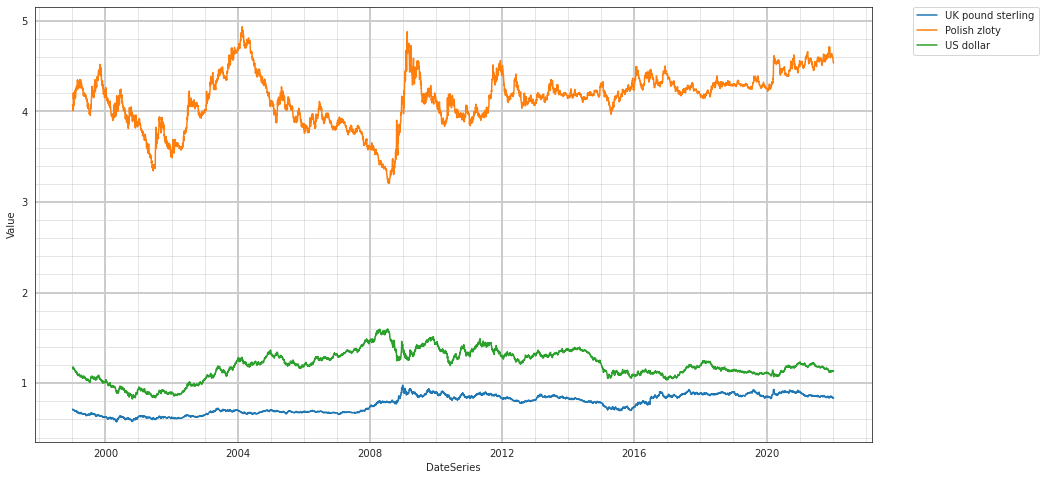

In [24]:
fig = plt.figure(figsize=(15,8))
plt.grid(which='major', linewidth = 2)
plt.minorticks_on()
plt.grid(which='minor', linewidth = 0.5)
sns.lineplot(x='DateSeries', y='Value', hue='Currency name', data = dataUSDGBPPNL)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

From graph you can clearly see that 1 GBP was never less expensive than 1 EUR (but 1 USD was).

### Find MAXIMUM and MINIMUM 
* Minimum and maximum for USD (US dollar) over years (sorting descending):

In [25]:
dataUSD = dataUSDGBPPNL.loc[(dataUSDGBPPNL['Currency name'] == 'US dollar')]
dataUSD.set_index('DateSeries', inplace=True)
print('------USD: 5 largest values by dates------')
print(dataUSD['Value'].nlargest().sort_values(ascending = False))
print('------USD: 5 smallest values by dates-----')
print(dataUSD['Value'].nsmallest().sort_values(ascending = False))

------USD: 5 largest values by dates------
DateSeries
2008-07-15    1.5990
2008-04-23    1.5940
2008-04-22    1.5931
2008-04-16    1.5928
2008-07-22    1.5919
Name: Value, dtype: float64
------USD: 5 smallest values by dates-----
DateSeries
2001-07-06    0.8384
2000-10-23    0.8377
2000-10-27    0.8324
2000-10-25    0.8307
2000-10-26    0.8252
Name: Value, dtype: float64


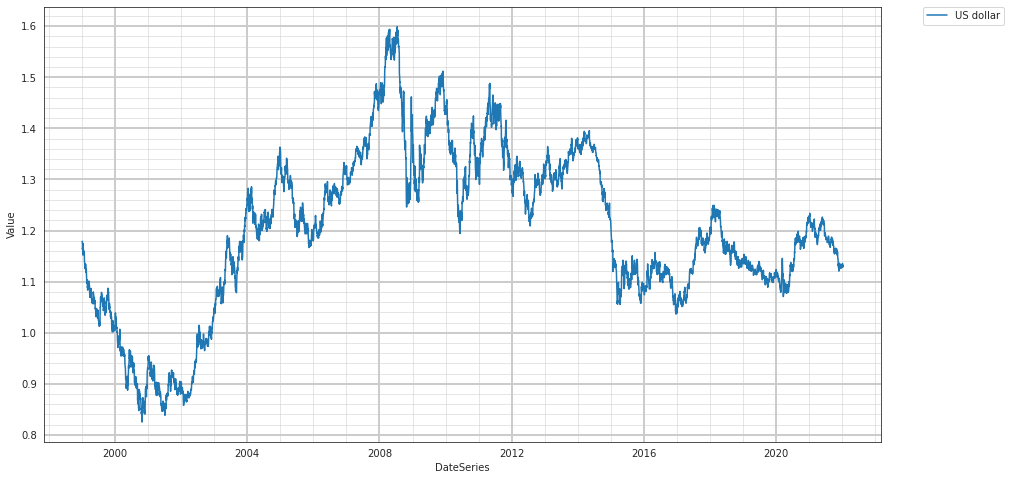

In [26]:
fig = plt.figure(figsize=(15,8))

plt.grid(which='major', linewidth = 2)
plt.minorticks_on()
plt.grid(which='minor', linewidth = 0.5)
sns.lineplot(x='DateSeries', y='Value', hue='Currency name', data = dataUSD)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

* Minimum and maximum for GBP (UK pound sterling) over years (sorting descending):

In [27]:
dataGBP = dataUSDGBPPNL.loc[(dataUSDGBPPNL['Currency name'] == 'UK pound sterling')]
dataGBP.set_index('DateSeries', inplace=True)
print('------GBP: 5 largest values by dates------')
print(dataGBP['Value'].nlargest().sort_values(ascending = False))
print('------GBP: 5 smallest values by dates-----')
print(dataGBP['Value'].nsmallest().sort_values(ascending = False))

------GBP: 5 largest values by dates------
DateSeries
2008-12-29    0.97855
2008-12-30    0.97420
2009-01-02    0.96100
2008-12-31    0.95250
2008-12-18    0.95090
Name: Value, dtype: float64
------GBP: 5 smallest values by dates-----
DateSeries
2000-04-28    0.5794
2000-10-25    0.5771
2000-10-24    0.5770
2000-10-23    0.5760
2000-05-03    0.5711
Name: Value, dtype: float64


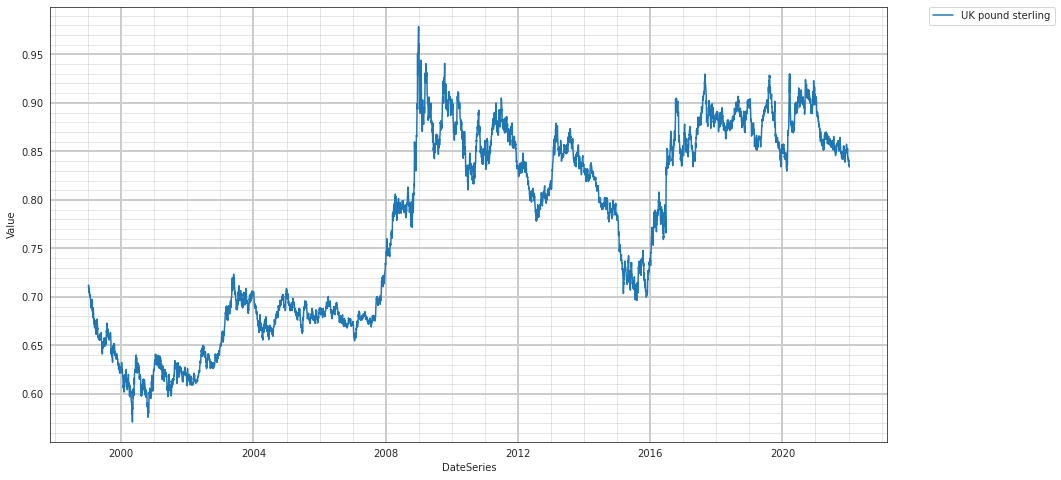

In [28]:
fig = plt.figure(figsize=(15,8))

plt.grid(which='major', linewidth = 2)
plt.minorticks_on()
plt.grid(which='minor', linewidth = 0.5)
sns.lineplot(x='DateSeries', y='Value', hue='Currency name', data = dataGBP)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

* Minimum and maximum for PNL (Polish Zloty) over years (sorting descending):

In [29]:
dataPNL = dataUSDGBPPNL.loc[(dataUSDGBPPNL['Currency name'] == 'Polish zloty')]
dataPNL.set_index('DateSeries', inplace=True)
print('------PNL: 5 largest values by dates------')
print(dataPNL['Value'].nlargest().sort_values(ascending = False))
print('------PNL: 5 smallest values by dates-----')
print(dataPNL['Value'].nsmallest().sort_values(ascending = False))

------PNL: 5 largest values by dates------
DateSeries
2004-02-20    4.9346
2004-02-19    4.8986
2004-03-01    4.8944
2004-02-18    4.8899
2004-02-23    4.8854
Name: Value, dtype: float64
------PNL: 5 smallest values by dates-----
DateSeries
2008-08-04    3.2131
2008-07-25    3.2080
2008-07-29    3.2067
2008-07-31    3.2063
2008-07-28    3.2053
Name: Value, dtype: float64


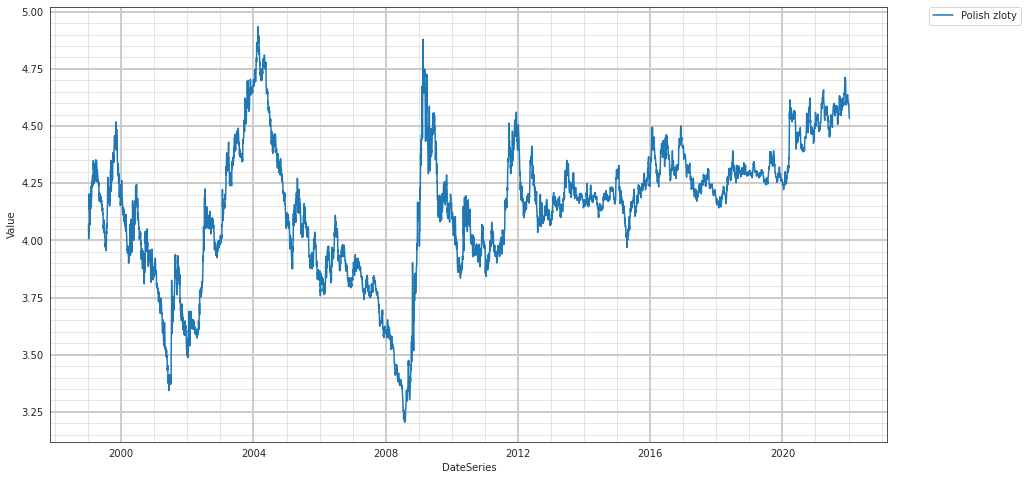

In [30]:
fig = plt.figure(figsize=(15,8))

plt.grid(which='major', linewidth = 2)
plt.minorticks_on()
plt.grid(which='minor', linewidth = 0.5)
sns.lineplot(x='DateSeries', y='Value', hue='Currency name', data = dataPNL)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Inspired by the notebook STARTER: EURO currency 1999-2022 + USD and GBP ex by DARIA CHEMKAEVA - https://www.kaggle.com/lsind18/starter-euro-currency-1999-2022-usd-and-gbp-ex

---
# Trend Analysis on Euro and Polish Zloty 
Now we'll generate a line plot to visualize the evolution of the euro-PNL exchange rate trends

In [31]:
PNL_df

,time,PNL
0,1999-01-04,4.0712
1,1999-01-05,4.0245
2,1999-01-06,4.0065
3,1999-01-07,4.0165
4,1999-01-08,4.0363
...,...,...
5953,2022-01-04,4.5667
5954,2022-01-05,4.5666
5955,2022-01-06,4.5614
5956,2022-01-07,4.5496


<AxesSubplot:>

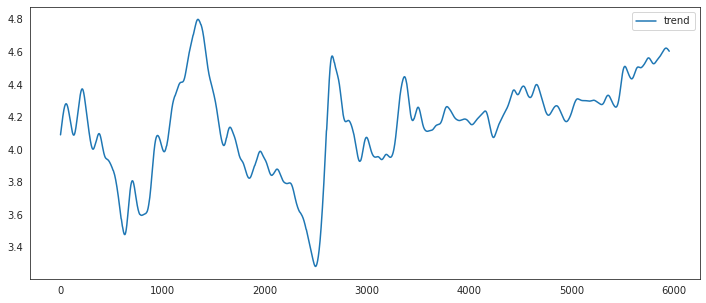

In [32]:
from statsmodels.tsa.filters.hp_filter import hpfilter
price_cycle, price_trend = hpfilter(PNL_df['PNL'], lamb = 129600)
PNL_df['trend'] = price_trend
PNL_df[['trend', 'PNL']].plot(figsize=(12,5))

The resulting figure has many wiggles representing the daily variation of the exchange rate. However, we are only interested in long term variation so next we are going to apply rolling mean with rolling window of 30 days showing variation of exchange rate every 30 days.

In [33]:
PNL_df['rolling_mean_30'] = PNL_df.PNL.rolling(30).mean()

# Test
PNL_df.tail()

,time,PNL,trend,rolling_mean_30
5953,2022-01-04,4.5667,4.606949,4.622953
5954,2022-01-05,4.5666,4.606062,4.619167
5955,2022-01-06,4.5614,4.605172,4.615677
5956,2022-01-07,4.5496,4.604280,4.610273
5957,2022-01-10,4.5334,4.603388,4.604847


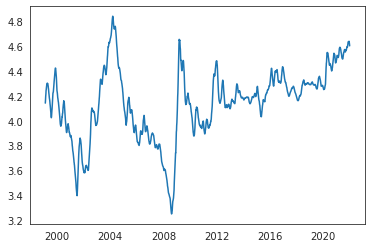

In [34]:
# Replot vs rolling mean
fig, ax = plt.subplots()
ax.plot(PNL_df.time, PNL_df.rolling_mean_30)

# Producing our story

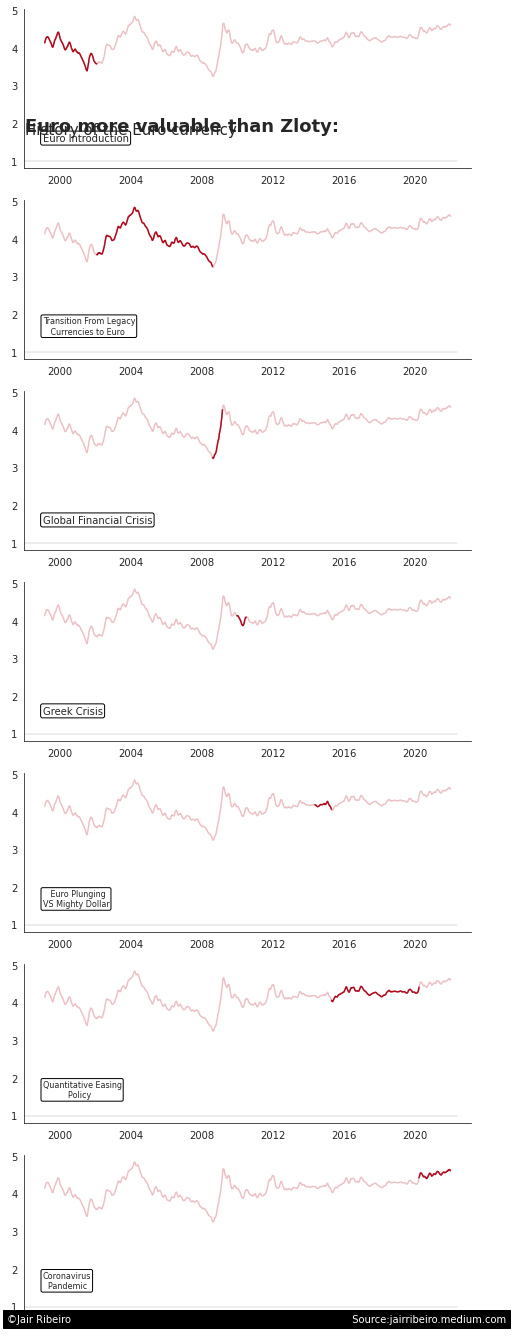

In [35]:
# Generating figure
fig , axs = plt.subplots(7,1,figsize=(8,24))

# Initializing our figures parameters
starts=[0, 782, 2455, 2807, 3935, 4175, 5440]
ends =[782, 2455, 2600, 2940, 4175, 5440, -1]
wys = [1.53, 1.48, 1.53, 1.53, 1.48, 1.48, 1.48]
texts = ['Euro Introduction', 'Transition From Legacy\n   Currencies to Euro', 'Global Financial Crisis',
       'Greek Crisis', '   Euro Plunging\nVS Mighty Dollar', 'Quantitative Easing\n          Policy',
       'Coronavirus\n  Pandemic']
sizes=[10, 8, 10, 10, 8, 8, 8]

# looping over figures
for start, end, wy, text, size, ax in zip(starts, ends, wys, texts, sizes, axs):
    # Background figure
    ax.plot(PNL_df.time, PNL_df.rolling_mean_30, color='#b00b1e', alpha=0.25)
    ax.axhline(y=1, color='#898989', alpha=0.2, xmax=0.97)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(left=False)
    
    # Foreground figure
    ax.plot(PNL_df.time[start:end], PNL_df.rolling_mean_30[start:end], color='#b00b1e')
    ax.text(x=datetime.strptime('1999', '%Y'), y=wy, s=text, size=size,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.2'))
    
# Title & subtitle
axs[0].text(x=datetime.strptime('1998', '%Y'), y=1.8, s='Euro more valuable than Zloty:', weight='bold', size=18)
axs[0].text(x=datetime.strptime('1998', '%Y'), y=1.71, s='History of the Euro currency', size=15)

# Signature
axs[6].text(x=datetime.strptime('1997', '%Y'), y=0.59, s='©Jair Ribeiro'+' '*90+'Source:jairribeiro.medium.com',
            backgroundcolor='#000000', color='#ffffff');

The figure above is too long and might be annoying for some readers, Next we are going to generate an animated GIF that summarizes all of the above figures.

In [36]:
# Initialize plot and animation camera
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(14,8))
camera = Camera(fig1)

# Looping over figures as above
for start, end, wy, text, size in zip(starts, ends, wys, texts, sizes):
    for i in range(0,5):
        # Main still figure
        ax1.plot(PNL_df.time, PNL_df.rolling_mean_30, color='#b00b1e')
        ax1.axhline(y=1, color='#898989', alpha=0.4, xmax=0.97)
        #ax1.text(x=datetime.strptime('2007', '%Y'), y=1.02, s='Euro stronger ↑', color='#898989')
        #ax1.text(x=datetime.strptime('2007', '%Y'), y=0.96, s='Zloty stronger ↓', color='#898989')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.tick_params(left=False)
        ax1.set_ylabel('Eur / PNL')
    
        ax2.plot(PNL_df.time, PNL_df.rolling_mean_30, color='#b00b1e', alpha=0.25)
        ax2.axhline(y=1, color='#898989', alpha=0.2, xmax=0.97)
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.tick_params(left=False)
        
        # Title
        ax1.text(x=datetime.strptime('1998', '%Y'), y=1.65, s='History of the Euro currency', size=15)
        
        # Signature
        axs[6].text(x=datetime.strptime('1997', '%Y'), y=0.59, s='©Jair Ribeiro'+' '*90+'Source:jairribeiro.medium.com',
            backgroundcolor='#000000', color='#ffffff');

        # Dynamic figure
        ax2.plot(PNL_df.time[start:end], PNL_df.rolling_mean_30[start:end], color='#b00b1e')
        ax2.text(x=datetime.strptime('1999', '%Y'), y=wy, s=text, size=size, bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))
        camera.snap()
    
# Compile & save animation
animation = camera.animate()
animation.save('euro_hist.gif')

# Clear figure
plt.clf()

# Display saved GIF
Image(url='euro_hist.gif')

<Figure size 1008x576 with 0 Axes>

# Visualizing the variations of Euro-PNL Currency During the Pandemic

Inspired by the code by HUSSAIN ALI NAQVI: https://www.kaggle.com/hussainalinaqvi/visualizing-euro-usd-currency-during-the-pandemic

In [37]:
exchange_rates = PNL_df

exchange_rates['time'] = pd.to_datetime(exchange_rates['time'])
exchange_rates.sort_values('time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,time,PNL,trend,rolling_mean_30
0,1999-01-04,4.0712,4.089802,NaN
1,1999-01-05,4.0245,4.094993,NaN
2,1999-01-06,4.0065,4.100184,NaN
3,1999-01-07,4.0165,4.105374,NaN
4,1999-01-08,4.0363,4.110561,NaN


In [38]:
#lets calculate the MEAN

In [39]:
euro_to_pnl = PNL_df[PNL_df['PNL'] != '-']
euro_to_pnl['PNL'] = euro_to_pnl['PNL'].astype(float)
euro_to_pnl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5895
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             5896 non-null   datetime64[ns]
 1   PNL              5896 non-null   float64       
 2   trend            5896 non-null   float64       
 3   rolling_mean_30  5867 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 230.3 KB


In [40]:
euro_to_pnl['rolling_mean'] = euro_to_pnl['PNL'].rolling(30).mean()
euro_to_pnl

,time,PNL,trend,rolling_mean_30,rolling_mean
0,1999-01-04,4.0712,4.089802,NaN,NaN
1,1999-01-05,4.0245,4.094993,NaN,NaN
2,1999-01-06,4.0065,4.100184,NaN,NaN
3,1999-01-07,4.0165,4.105374,NaN,NaN
4,1999-01-08,4.0363,4.110561,NaN,NaN
...,...,...,...,...,...
5891,2022-01-04,4.5667,4.606949,4.622953,4.622953
5892,2022-01-05,4.5666,4.606062,4.619167,4.619167
5893,2022-01-06,4.5614,4.605172,4.615677,4.615677
5894,2022-01-07,4.5496,4.604280,4.610273,4.610273


Let's compare how the value of the dollar changed during the COVID-19 pandemic.



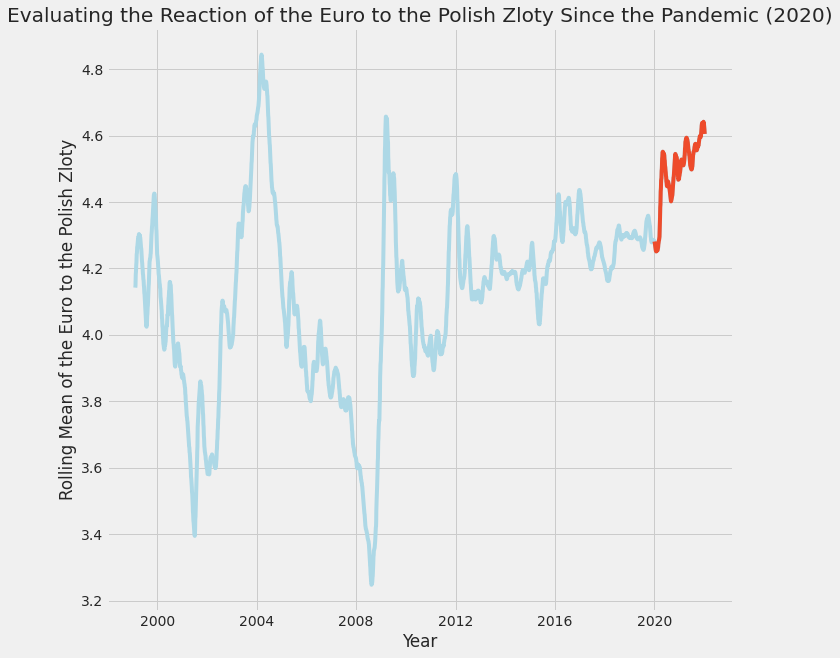

In [41]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

style.use('fivethirtyeight')
pandemic=euro_to_pnl.copy()[euro_to_pnl['time'].dt.year>=2020]

fig,ax=plt.subplots(figsize=(10,10))
ax.plot(euro_to_pnl['time'],euro_to_pnl['rolling_mean'],color='#ADD8E6')
ax.plot(pandemic['time'],pandemic['rolling_mean'],color='#EE4B2B')
ax.set_xlabel('Year')
ax.set_ylabel('Rolling Mean of the Euro to the Polish Zloty')
ax.set_title('Evaluating the Reaction of the Euro to the Polish Zloty Since the Pandemic (2020)')

plt.show()

# EUR/PNL Exchange Prediction

In [42]:
!pip install pycaret-ts-alpha

     |████████████████████████████████| 488 kB 285 kB/s            
     |████████████████████████████████| 636 kB 5.8 MB/s            
     |████████████████████████████████| 167 kB 14.0 MB/s            
     |████████████████████████████████| 114 kB 13.8 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 22.3 MB 1.5 MB/s             
     |████████████████████████████████| 24.2 MB 785 kB/s             
     |████████████████████████████████| 6.2 MB 38.3 MB/s            
     |████████████████████████████████| 43 kB 1.2 MB/s             
     |████████████████████████████████| 15.6 MB 56.0 MB/s            
     |████████████████████████████████| 10.4 MB 34.7 MB/s            
     |████████████████████████████████| 25.9 MB 810 kB/s             
     |████████████████████████████████| 1.4 MB 59.4 MB/s            
     |████████████████████████████████| 9.5 MB 27.9 MB/s            
     |████████████████████████████████| 6.1 MB 37.4 MB/s

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series

In [44]:
data0=pd.read_csv('../input/euro-exchange-daily-rates-19992020/euro-daily-hist_1999_2022.csv')
data0.head()


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-01-10,1.5774,1.9558,6.3969,1.4327,1.0446,7.2128,NaN,24.357,7.4381,NaN,0.83398,NaN,8.8233,7.5278,358.40,16181.90,3.5303,83.8000,146.2,130.45,1355.68,NaN,NaN,NaN,23.0597,4.7536,10.0253,1.6753,58.141,4.5334,4.9449,84.9825,10.3038,1.5344,NaN,NaN,38.0740,15.7183,1.1318,17.6999
1,2022-01-07,1.5804,1.9558,6.4343,1.4374,1.0422,7.2060,NaN,24.439,7.4380,NaN,0.83430,NaN,8.8133,7.5214,358.68,16188.43,3.5135,83.9780,146.0,130.90,1359.96,NaN,NaN,NaN,23.1109,4.7553,10.0288,1.6748,58.046,4.5496,4.9451,85.2980,10.2839,1.5356,NaN,NaN,38.0740,15.7206,1.1298,17.6701
2,2022-01-06,1.5778,1.9558,6.4420,1.4451,1.0395,7.2187,NaN,24.528,7.4393,NaN,0.83593,NaN,8.8272,7.5197,359.84,16291.88,3.5247,84.2475,146.8,131.05,1362.06,NaN,NaN,NaN,23.2549,4.7670,10.0350,1.6752,57.943,4.5614,4.9435,86.5088,10.3265,1.5388,NaN,NaN,37.9620,15.5504,1.1315,17.7932
3,2022-01-05,1.5600,1.9558,6.4146,1.4399,1.0364,7.2087,NaN,24.581,7.4384,NaN,0.83546,NaN,8.8227,7.5190,362.15,16263.02,3.4989,84.1610,146.8,131.03,1354.61,NaN,NaN,NaN,23.1422,4.7466,9.9672,1.6597,57.713,4.5666,4.9460,85.7275,10.2545,1.5340,NaN,NaN,37.6070,15.2446,1.1319,17.9369
4,2022-01-04,1.5682,1.9558,6.4174,1.4382,1.0355,7.1924,NaN,24.745,7.4378,NaN,0.83618,NaN,8.7919,7.5185,365.12,16199.73,3.4909,84.2055,147.8,131.17,1352.91,NaN,NaN,NaN,23.1808,4.7214,10.0138,1.6668,57.988,4.5667,4.9481,84.9202,10.2808,1.5310,NaN,NaN,37.5820,15.1384,1.1279,18.1080


In [45]:
data1=data0[['Period\\Unit:','[Polish zloty ]']]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Period\Unit:     5958 non-null   object
 1   [Polish zloty ]  5958 non-null   object
dtypes: object(2)
memory usage: 93.2+ KB


In [46]:
data1.columns=['Date','EUR/USD']

In [47]:
drop=[]
EURO=[]
for i,item in enumerate(data1['EUR/USD']):
    if item=='-':
        drop+=[i]
    else:
        EURO+=[float(item)]

In [48]:
data1=data1.drop(index=drop)
data1['EUR/USD']=EURO
data1

,Date,EUR/USD
0,2022-01-10,4.5334
1,2022-01-07,4.5496
2,2022-01-06,4.5614
3,2022-01-05,4.5666
4,2022-01-04,4.5667
...,...,...
5953,1999-01-08,4.0363
5954,1999-01-07,4.0165
5955,1999-01-06,4.0065
5956,1999-01-05,4.0245


In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     5896 non-null   object 
 1   EUR/USD  5896 non-null   float64
dtypes: float64(1), object(1)
memory usage: 138.2+ KB


In [50]:
data1.index = pd.DatetimeIndex(data1["Date"])
data1.drop(["Date"],axis=1,inplace=True)
data1

,EUR/USD
Date,
2022-01-10,4.5334
2022-01-07,4.5496
2022-01-06,4.5614
2022-01-05,4.5666
2022-01-04,4.5667
...,...
1999-01-08,4.0363
1999-01-07,4.0165
1999-01-06,4.0065


In [51]:
data1 = data1.asfreq('d')
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8408 entries, 1999-01-04 to 2022-01-10
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR/USD  5896 non-null   float64
dtypes: float64(1)
memory usage: 131.4 KB


In [52]:
data2=data1.fillna(method='ffill')
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8408 entries, 1999-01-04 to 2022-01-10
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR/USD  8408 non-null   float64
dtypes: float64(1)
memory usage: 131.4 KB


In [53]:
# data must be univariate
data=data2['EUR/USD']
print(type(data))
data

<class 'pandas.core.series.Series'>


Date
1999-01-04    4.0712
1999-01-05    4.0245
1999-01-06    4.0065
1999-01-07    4.0165
1999-01-08    4.0363
               ...  
2022-01-06    4.5614
2022-01-07    4.5496
2022-01-08    4.5496
2022-01-09    4.5496
2022-01-10    4.5334
Freq: D, Name: EUR/USD, Length: 8408, dtype: float64

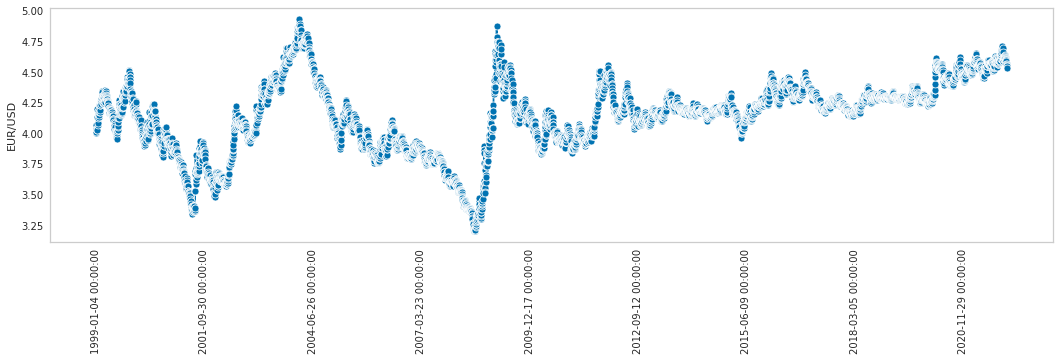

In [54]:
# plot_series
_ =plot_series(data)
plt.xticks(rotation=90)
plt.grid()

In [55]:
#TimeSeriesExperiment from pycarat
exp = TimeSeriesExperiment()
exp.setup(data=data,session_id=42,fh=30)

,Description,Value
0,session_id,42
1,Original Data,"(8408, 1)"
2,Missing Values,False
3,Transformed Train Set,"(8378,)"
4,Transformed Test Set,"(30,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


In [56]:
#ARIMA
model = exp.create_model("arima")
model

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-09-12,0.0399,0.0456,0.0087,0.0087,1.1449,-2.7120
1,2021-10-12,0.0298,0.0402,0.0065,0.0065,0.8542,-3.3750
2,2021-11-11,0.0447,0.0517,0.0096,0.0096,1.2821,-0.5409
Mean,NaT,0.0381,0.0459,0.0082,0.0083,1.0937,-2.2093
SD,NaT,0.0062,0.0047,0.0013,0.0013,0.1784,1.2104


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [57]:
y_train = exp.get_config("y_train")
y_train[5:]

1999-01-09    4.0363
1999-01-10    4.0363
1999-01-11    4.0320
1999-01-12    4.0330
1999-01-13    4.2033
               ...  
2021-12-07    4.5942
2021-12-08    4.5962
2021-12-09    4.6045
2021-12-10    4.6123
2021-12-11    4.6123
Freq: D, Name: EUR/USD, Length: 8373, dtype: float64

In [58]:
y_predict = exp.predict_model(model)
#plot_series(data, y_train, y_predict, labels=['All','Train','Test Predictions','Future Prediciton'])
#plt.grid()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,ARIMA,0.0266,0.0349,0.0058,0.0058,0.7640,-0.3179


In [59]:
#SMAPE
tuned_model = exp.tune_model(model,optimize = 'SMAPE')
tuned_model

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-09-12,0.0510,0.0561,0.0111,0.0111,1.4615,-4.6267
1,2021-10-12,0.0225,0.0260,0.0049,0.0049,0.6454,-0.8242
2,2021-11-11,0.0395,0.0454,0.0085,0.0085,1.1353,-0.1851
Mean,NaT,0.0377,0.0425,0.0081,0.0082,1.0807,-1.8787
SD,NaT,0.0117,0.0125,0.0025,0.0026,0.3354,1.9606


ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 0, 0, 14),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [60]:
exp.predict_model(tuned_model)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,ARIMA,0.0251,0.0324,0.0055,0.0055,0.7207,-0.1405


2021-12-12    4.6124
2021-12-13    4.6123
2021-12-14    4.6121
2021-12-15    4.6119
2021-12-16    4.6117
2021-12-17    4.6117
2021-12-18    4.6118
2021-12-19    4.6118
2021-12-20    4.6119
2021-12-21    4.6120
2021-12-22    4.6120
2021-12-23    4.6122
2021-12-24    4.6123
2021-12-25    4.6124
2021-12-26    4.6124
2021-12-27    4.6125
2021-12-28    4.6126
2021-12-29    4.6126
2021-12-30    4.6127
2021-12-31    4.6128
2022-01-01    4.6128
2022-01-02    4.6129
2022-01-03    4.6130
2022-01-04    4.6130
2022-01-05    4.6131
2022-01-06    4.6131
2022-01-07    4.6132
2022-01-08    4.6133
2022-01-09    4.6133
2022-01-10    4.6134
Freq: D, Name: EUR/USD, dtype: float64

In [61]:
# y_pred_future for Future Prediciton
final_model = exp.finalize_model(tuned_model)
y_pred_future = exp.predict_model(final_model, verbose=False)

#_=plot_series(data, y_train, y_predict, y_pred_future, labels=['All','Train','Test Predictions','Future Prediciton'])
#plt.grid()

In [62]:
exp.predict_model(final_model)

2022-01-11    4.5331
2022-01-12    4.5331
2022-01-13    4.5331
2022-01-14    4.5332
2022-01-15    4.5332
2022-01-16    4.5333
2022-01-17    4.5333
2022-01-18    4.5331
2022-01-19    4.5332
2022-01-20    4.5332
2022-01-21    4.5332
2022-01-22    4.5332
2022-01-23    4.5333
2022-01-24    4.5332
2022-01-25    4.5332
2022-01-26    4.5333
2022-01-27    4.5333
2022-01-28    4.5334
2022-01-29    4.5335
2022-01-30    4.5335
2022-01-31    4.5336
2022-02-01    4.5336
2022-02-02    4.5337
2022-02-03    4.5337
2022-02-04    4.5338
2022-02-05    4.5338
2022-02-06    4.5339
2022-02-07    4.5340
2022-02-08    4.5340
2022-02-09    4.5341
Freq: D, Name: EUR/USD, dtype: float64

Official Rates for january:

"2022-01-03" "1.1355"

"2022-01-04" "1.1279"

"2022-01-05" "1.1319"

"2022-01-06" "1.1315"

"2022-01-07" "1.1298"

"2022-01-10" "1.1318"

"2022-01-11" "1.1336" 

"2022-01-12" "1.1370"

"2022-01-13" "1.1463"

"2022-01-14" "1.1447"

"2022-01-17" "1.1403"

"2022-01-18" "1.1367"

"2022-01-19" "1.1345"

"2022-01-20" "1.1338" 

Inspired by the notebook: EUR/USD Exchange Prediction Pycaret by STPETE_ISHII - https://www.kaggle.com/stpeteishii/eur-usd-exchange-prediction-pycaret

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 8378
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 7)   Log Likelihood               18403.540
Date:                           Fri, 21 Jan 2022   AIC                         -36801.079
Time:                                   00:37:52   BIC                         -36779.982
Sample:                                        0   HQIC                        -36793.874
                                          - 8378                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.495e-05      0.000      0.250      0.803      -0.001       0.001
ar.L1          0.8411      0.003    269.238      0.000       0.835       0.847
sigma2         0.0007   4.52e-06    159.530      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  95.86   Jarque-Bera (JB):             38063.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""